# Lab Program 3

## Machine Learning - Regression Analysis

## Name: Jerin Mathew
## Roll No: 2139455

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#For modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
df = pd.read_csv('C:/ClassesMSC/DataSets/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
sum(df.duplicated())

0

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### we will plot scatter plot between each of the attributes to if there is a correaltion between:

#### independent variables and dependent variables
#### independent variables and other dependent variables

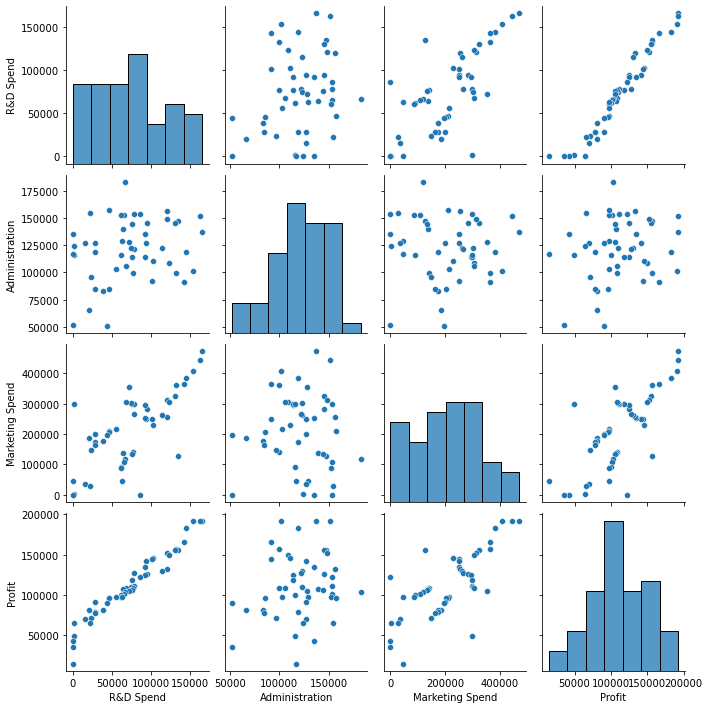

In [7]:
sns.pairplot(df)

<AxesSubplot:>

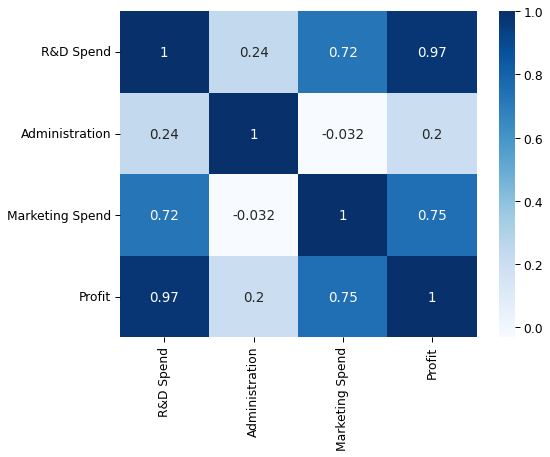

In [9]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

corr_matrix=df.corr()
#annot will show the numbers inside each colored box
sns.heatmap(corr_matrix,annot=True,cmap='Blues')

### There is high correlation between(dep. var and indep. var):

#### Profit and R&D spend
#### Profit and Marketing Spend
### There is high correlation between(indep. var and indep. var):

#### Marketing Spend and R&D spend
#### So, it's recommended to remove Adminstration column and either Marketing Spend or R&D spend

In [10]:
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\JERIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


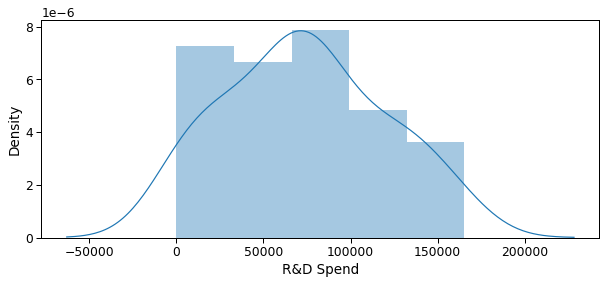

In [13]:
plt.figure(figsize=(10,4))
sns.distplot(df['R&D Spend']);

C:\Users\JERIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

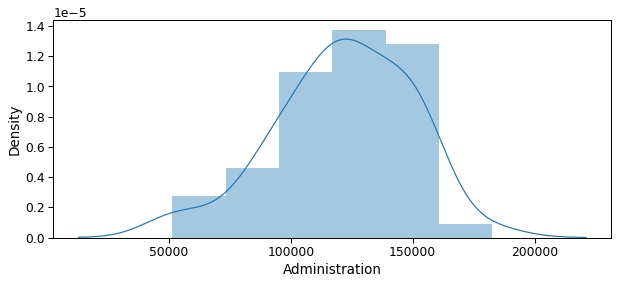

In [14]:
plt.figure(figsize=(10,4))
sns.distplot(df['Administration'])

C:\Users\JERIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


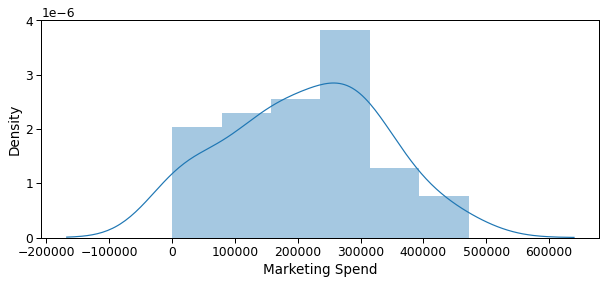

In [15]:
plt.figure(figsize=(10,4))
sns.distplot(df['Marketing Spend']);

C:\Users\JERIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


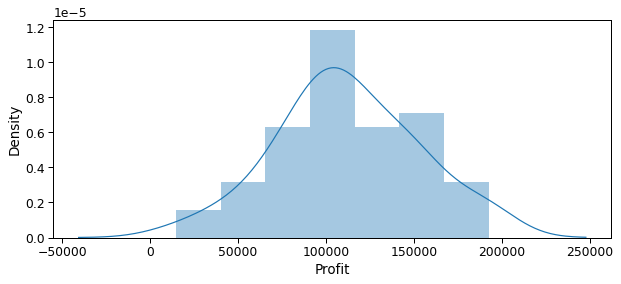

In [16]:
fig=plt.figure(figsize=(10,4))
sns.distplot(df['Profit']);

In [17]:
## Most of the distribution indicates normal distribution which means we may not need to make any scaling

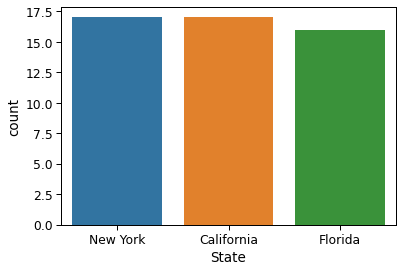

In [18]:
sns.countplot(x='State',data=df);

### Calculation of VIF

In [19]:
X=df[['R&D Spend', 'Administration', 'Marketing Spend']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data

,feature
0,R&D Spend
1,Administration
2,Marketing Spend


In [20]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0        R&D Spend  8.384571
1   Administration  4.026406
2  Marketing Spend  7.593984


### As we can see, R&D Spend and marketing spend have very high values of VIF, indicating that these two variables are highly correlated. Hence, considering these two features together leads to a model with high multicollinearity.

### Modeling

In [21]:
def model_summary(x,y):
    xtr = sm.add_constant(np.array(df[x]))
    model = sm.OLS(np.array(df[y]), xtr).fit()
    print(model.summary())

In [22]:
model_summary(['R&D Spend','Marketing Spend','Administration'],'Profit')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        01:31:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

#### We can notice that here is the p-value in Marketing Spend and in Administration is significant so, that's why we will remove them

In [23]:
df.drop(columns=['Administration','Marketing Spend'],inplace=True)

In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
# Encoding Categorical Data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [26]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
# Training the Multiple Linear Regression model on the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[104968.88 103282.38]
 [133957.34 144259.4 ]
 [135497.03 146121.95]
 [ 72485.31  77798.83]
 [179362.05 191050.39]
 [109820.28 105008.31]
 [ 65657.67  81229.06]
 [100480.72  97483.56]
 [111730.62 110352.25]
 [169713.52 166187.94]]


In [29]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 6789.980111923031
MSE 67565210.75864252
RMSE 8219.806004927521


In [30]:
r2_score(y_test, y_pred)

0.9471689304016875

## THE MODEL HAS 95% ACCURACY